In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=3a7dc90fb00f2e424c1f3b73481a7c5c6b6157ac4f483802211d2d62ab886f58
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [3]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [5]:
# Normalisasi data
data = data / data.max(axis=0)

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [6]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Inisialisasi bobot SOM secara acak.

In [7]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Melatih SOM dengan data menggunakan metode train_random.

In [8]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

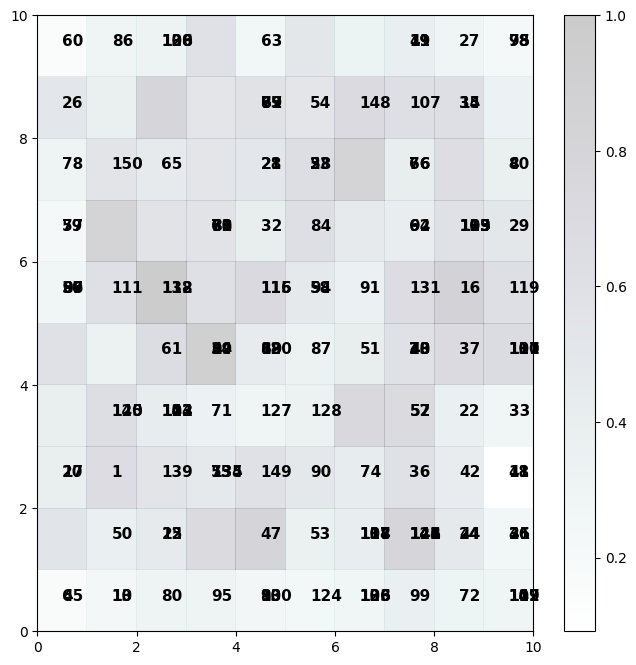

In [9]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()